In [14]:
import numpy as np
import matplotlib.pyplot as plt
import time
start=time.time()

In [15]:
def ff(x):
    f1=4*x[0]**2 +4*x[1]**2
    f2=(x[0]-5)**2+(x[1]-5)**2
    return f1, f2
def g(x):
    estatu=None
    g1=(x[0]-5)**2+x[1]**2 #<=25
    g2=(x[0]-8)**2+(x[1]+3)**2 #>=7.7
    if g1<=25 and g2>=7.7:
        status=True
    else:
        status=False
    return status

In [16]:
xmax=np.array([5,3])
xmin=np.array([0,0])
fator=np.array([0.7,0.5])

In [17]:
def maxmin(fun1, fun2):
    R1=max(fun1)-min(fun1)
    R2=max(fun2)-min(fun2)
    return R1, R2

In [ ]:
#função para verificar se a solução esta contida no archive
def inc(x, ficheiro):
    aux=None
    for i in range(ficheiro.shape[0]):
        j=0
        for col in range(0,ficheiro.shape[1]):
            if x[col] == ficheiro[i][col]:
                j=j+1
        if j == ficheiro.shape[1]:
            aux = True
        else:
            aux=False
            
    return aux

In [ ]:
def dom(fun1, fun2, nfun1, nfun2,R1,R2):
    deltadom=0
    if (fun1 !=nfun1  and fun2 !=nfun2):
        deltadom=(fun1-nfun1)/R1*(fun2-nfun2)/R2
    return deltadom
def maxdom(fun1,fun2,f1n, f2n, R1,R2):
    for i in range(fun1.size):
        aux[i]=dom(fun1[i],fun2[i], f1n, f2n, R1, R2)
    mdom=np.amax(aux)
    return mdom
def maxdom2(fun1, fun2, f1n, f2n, R1, R2):
    deltadom=0
    for i in range(fun1.size):
        if (fun1[i] !=f1n  and fun2[i] !=f2n):
            aux[i]=(fun1[i]-f1n)/R1*(fun2[i]-f2n)/R2
    mdom=np.amax(aux)
    return mdom

In [ ]:
#new solution based on the current solution
def newsol(inguess, phi, C):
    x_j=np.zeros(inguess.size)
    status=0
    cont=0
    while status!=1:
        for i in range(0,inguess.size):
            aux=x_j[i]+xmax[i]*np.random.rand()*(-1)**np.random.choice([1,2])*phi
            if aux>=xmax[i]:
                aux=xmax[i]
            elif aux<=xmin[i]:
                aux=xmin[i]
            x_j[i]=aux
       
        if g(x_j):      
            status=1
        else:
            status=0
            C=-1
        cont=cont+1
        if cont>400:
            print("erro")
            break

    return x_j

In [ ]:
def reo(archive):
    linhas=archive.shape[0]
    nof=archive.shape[1]
    archive2=np.zeros([linhas, nof])
    cont=0
    while archive.shape[0]>0:
        raz=np.empty(linhas)
        fun1=np.empty(archive.shape[0])
        fun2=np.empty(archive.shape[0])
        linhas=archive.shape[0]
        maxr=0
        posi=0
        for i in range(0,linhas):
            fun1[i], fun2[i]=ff(archive[i])
            raz[i]=fun2[i]/fun1[i]
            if raz[i]>maxr:
                maxr=raz[i]
                posi=i
        #archive2=np.append(archive2, archive[posi], axis=1)
        for col in range(0, nof):
            archive2[cont][col]=archive[posi][col]
        cont=cont+1
        archive=np.delete(archive, posi, axis=0)
        #raz=np.delete(raz, posi)
    #print(archive.shape)
    #print(archive2.shape)
    return archive2
def delws(archive):
    nof=archive.shape[1]
    linhas=archive.shape[0]
    cont=0
    while cont<200:
        linhas=archive.shape[0]
        lista=np.empty(0)
        fun1=np.empty(linhas)
        fun2=np.empty(linhas)
        r=np.random.choice(np.arange(archive.shape[0]))
        f1c, f2c =ff(archive[r])
        c=0
        for i in range(linhas):
            fun1[i], fun2[i] =ff(archive[i])
            if f1c<fun1[i] and f2c<fun2[i]:
                lista=np.append(lista, i)
        while c<lista.size:
            archive=np.delete(archive, lista[c], axis=0)
            c=c+1
        cont=cont+1
    
    return archive


def clust(size, archive):
    nof=archive.shape[1]
    while archive.shape[0]>size:
        linhas=archive.shape[0]
        mm=np.empty(linhas)
        deli=0
        for u in range(1,linhas):
            mm[u-1]=np.sqrt((archive[u-1][0]-archive[u][0])**2+(archive[u-1][1]-archive[u][1])**2)
        diff=800
        ind=0
        for i in range(0, mm.size):
            if mm[i]<diff:
                diff=mm[i]
                ind=i
        #ind=np.argmin(mm)
        if ind!=0 and ind!=(mm.size-1):
            if mm[ind+1]<= mm[ind-1]:
                deli=ind+1
            elif mm[ind-1]<=mm[ind+1]:
                deli=ind
        elif ind==(mm.size-1):
            #lista=np.append(lista, ind-1)
            deli=ind-1
        else:
            #lista=np.append(lista, ind+1)
            deli=ind+1  
        archive=np.delete(archive, deli, axis=0)   
            
    return archive

In [ ]:
def iarch(HL, SL, phi, nofvar):
    x_j=np.random.rand(nofvar)
    d_solution=np.empty([0,nofvar])#np.zeros([SL, nofvar])
    C=1
    archive=np.empty([0,nofvar])
    lines=0
    while lines<(SL):
        for i in range(0,nofvar):
            x_j[i]=np.random.uniform(low=xmin[i], high=xmax[i], size=1)*0.8
        if g(x_j):
            d_solution=np.vstack([d_solution, x_j])
            lines=lines+1
    return d_solution

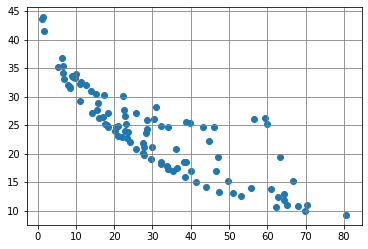

In [ ]:
HL=50
SL=100
phi=0.95
nofvar=2
Tmax=1000
Tmin=0.1
alpha=0.85
N=1000

archive=iarch(HL,SL, phi, nofvar)
fun1=np.zeros(archive.shape[0])
fun2=np.zeros(archive.shape[0])
for lin in range(archive.shape[0]):
    fun1[lin], fun2[lin]=ff(archive[lin])
o=np.random.choice(np.arange(archive.shape[0]))

#setup as soluções corrente
cc=0
x_i=archive[o]
f1c=fun1[o]
f2c=fun2[o]
r=0
max_r=20
#plot das soluções contida no archive 
plt.scatter(fun1, fun2)
plt.grid(b=None, color='grey', which='major', axis='both')

In [ ]:
%%time
while(Tmax>Tmin):
    Tmax=Tmax*alpha
    ciclo=0
    while ciclo<N:
        #print("ciclo:", ciclo)
        x_j=newsol(x_i, phi, 1)
        f1n, f2n = ff(x_j)
        fun1=np.zeros(archive.shape[0])
        fun2=np.zeros(archive.shape[0])
        for i in range(archive.shape[0]):
            fun1[i], fun2[i]=ff(archive[i])
        R1, R2 = maxmin(fun1, fun2)
        aux=np.zeros(archive.shape[0])
        #print("valores da função corrente",f1c, f2c)
        #print("valores da função nova", f1n, f2n)
        deltaE=maxdom(fun1,fun2,f1n, f2n, R1,R2)-maxdom(fun1,fun2,f1c, f2c, R1,R2)
        #print("a variação de energia", deltaE)
        prob=np.exp(-deltaE/Tmax)
        p=np.random.rand()
        #print("prob=", prob, "p(aleatorio)=", p)
        if(deltaE<=0 or p<prob):
            x_i=x_j
            f1c=f1n
            f2c=f2n
            #print("a solução nova aceita")
            aux=maxdom2(fun1,fun2,f1n, f2n, R1,R2)
               
            #print"os valores de k=", k, "souções dominadas k_d=", k_d, "E=0", knd)
            if aux<=0:#
                #print("adicionado a nova solução")
                #archive=np.vstack([archive, x_j])
                #print(archive.shape[0])
                razc=f2n/f1n
                raz=np.empty(fun1.size)
                for i in range(archive.shape[0]):
                    raz[i]=fun2[i]/fun1[i]
                    if i!=0 and razc<raz[i-1] and razc>raz[i]:
                        archive=np.insert(archive, i, x_j,axis=0)
                        if razc<raz[i-1] and razc>raz[i]:
                            archive=np.insert(archive, i, x_j,axis=0)
                    elif i==0 and razc>raz[0]:
                        archive=np.insert(archive, 0, x_j,axis=0)
                if archive.shape[0]>SL:
                    archive=delws(archive)
                    archive=clust(HL,archive)
                    cc=1
                    if inc(x_i, archive):
                        if r<max_r:
                            archive=np.vstack([archive, x_i])
                            #print("adicionado novamente")
                        else:
                            ale=np.random.choice(np.arange(archive.shape[0]))
                            x_i=archive[ale]
                            r=r+1
                    else:
                        r=0
        ciclo=ciclo+1
                
end=time.time()
minu=np.around((end-start)/60,0)
sec=np.around((end-start)%60,0)
print("archive", archive.shape[0])
print(end-start)
print(minu, "min", sec, "segundos")

/home/tiago/.local/lib/python3.6/site-packages/ipykernel_launcher.py:45: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
/home/tiago/.local/lib/python3.6/site-packages/ipykernel_launcher.py:45: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
/home/tiago/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars
/home/tiago/.local/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars


In [ ]:
for lin in range(archive.shape[0]-1):
    fun1[lin], fun2[lin]=ff(archive[lin])
plt.scatter(fun1, fun2)
plt.grid(b=None, color='grey', which='major', axis='both')

def displacement(P,Q):
    displace=0
    Ps=P.shape[0]
    Qs=Q.shape[0]
    for i in range(0,Ps-1):
        dif=0
        mvalue=0
        for u in range(0,Qs-1):
            aux=0
            for col in range(0,P.shape[1]):
                aux=aux+(P[i][col]-Q[u][col])**2
            dif=np.sqrt(aux)
            if dif<mvalue:
                mvalue=dif
        displace=displace+dif
    displace=displace/Ps
    return displace

In [ ]:
# escolher o ponto de referência 
f1max=max(fun1)
f2max=max(fun2)
#numeros de pontos a serem seecionado
npontos=10
print("Os valores máximo, fun1, fun2", f1max, f2max, "respectivamente")
pref=([f1max, f2max])
